# **An (Incomplete) Catalogue of DnD Monsters ($5^{th}$ Edition!)**

The world of Dungeons and Dragons has been the stage for countless epic quests and absurd encounters. The creativity and storytelling that lies at the heart of the game has enticed players to band together as adventurers time and time again. 

## **1. Introducing Our Data**
Of course, no adventure is complete without monsters to slay! We've collected a dataset of 2947 monsters from the $5^{th}$ (and most successful) edition of DnD from https://www.kaggle.com/datasets/poketch/dungeons-dragons-5e-monster-data. Let's take a look at our dataset.


In [1]:
# import useful libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load in dataset stored as csv file
monsters = pd.read_csv("5e_monster_data_5eTools.csv")

# check dimensions of dataframe
print(monsters.shape)

# peek at first 5 rows of data
monsters.head()

(2947, 30)


,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,...,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
0,0,Ancient Deep Crow,187,15d12 + 90,-,18,-,15,23,16,...,20,80,-,-,-,-,H,U,monstrosity,AI
1,1,Auspicia Dran,52,8d8 + 16,-,15,-,2,16,14,...,30,-,-,-,-,-,M,NG,humanoid,AI
2,2,Brahma Lutier,33,6d8 + 6,-,12,-,2,12,15,...,30,-,-,-,-,-,M,N,humanoid,AI
3,3,Chaos Quadrapod,52,7d10 + 14,-,14,-,4,18,13,...,40,-,-,-,40,-,L,CE,aberration,AI
4,4,Clockwork Dragon,22,4d8 + 4,-,16,-,1,14,10,...,30,60,-,-,-,-,M,N,construct,AI


In [3]:
monsters.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [4]:
monsters.columns

Index(['id', 'name', 'hp', 'hp formula', 'hp special', 'ac', 'ac special',
       'cr', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'str save', 'dex save',
       'con save', 'int save', 'wis save', 'cha save', 'walk', 'fly', 'swim',
       'burrow', 'climb', 'hover', 'size', 'alignment', 'type', 'source'],
      dtype='object')

With 30 columns, there's a lot of information about each monster. Let's take a look at a summary of this data and see if we can find anything of interest. 

In [5]:
monsters.describe(include="all")

,id,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,...,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
count,2947.000000,2947,2947,2947,2947,2947,2947,2947,2947,2947,...,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947
unique,NaN,2664,235,501,46,22,9,35,31,26,...,16,14,11,9,10,2,7,26,15,79
top,NaN,Expert,22,5d8 + 5,-,12,-,2,10,14,...,30,-,-,-,-,-,M,U,humanoid,MM
freq,NaN,4,106,58,2893,419,2921,339,347,578,...,1644,2375,2606,2840,2667,2793,1604,570,1015,450
mean,1473.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,850.869947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,736.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1473.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2209.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. **Cleaning our Data!**

There's a lot going on here! 

If we focus on the ***name*** column, we see that there are only 2664 unique monster names but we know our dataset has 2947 monsters. Some names are being repeated - could we have multiple different monsters that share the same name, or do we have duplicate rows with the same monster?

Our summary also shows that the most common name is "**Expert**", so let's take a look at all rows where the monster's name is "**Expert**".

In [6]:
monsters[monsters['name'] == 'Expert']

,id,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,...,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
289,289,Expert,66,12d8 + 12,-,17,-,-,10,20,...,30,-,-,-,-,-,M,-,humanoid,DC
391,391,Expert,11,2d8 + 2,-,14,-,-,10,15,...,30,-,-,-,-,-,M,-,humanoid,ESK
2142,2142,Expert,55,10d8 + 10,-,16,-,-,10,18,...,30,-,-,-,-,-,M,-,humanoid,SDW
2253,2253,Expert,44,8d8 + 8,-,15,-,-,10,16,...,30,-,-,-,-,-,M,-,humanoid,SLW


We have 4 different entries for "**Expert**", all from different ***sources***. It seems like this might be a potential source of duplication. Let's take a look at the different ***sources*** this data has been extracted from.

In [7]:
monsters['source'].value_counts()

MM                     450
MPMM                   261
VGM                    143
MTF                    140
TftYP                  133
                      ... 
DoD                      1
UA2020SubclassesPt2      1
XGE                      1
NRH-AWoL                 1
SADS                     1
Name: source, Length: 79, dtype: int64

There are 79 different sources the data was collected from! No wonder there are some inconsistencies in the data. Let's check how many monsters have been repeated in our dataset.

In [8]:
# get all monsters whose names appear more than once
monsters['name'].value_counts()[monsters['name'].value_counts() > 1]

Expert                  4
Warrior                 4
Demogorgon              3
Chwinga                 3
Spellcaster (Healer)    3
                       ..
Githyanki Gish          2
Meazel                  2
Death Kiss              2
Naiad                   2
Tressym                 2
Name: name, Length: 275, dtype: int64

Yikes! 275 different monsters have repeated entries. 

To remove these duplicates, let's keep the stats of each monster from the ***most frequently used source*** that the monster's data is obtained from.

In [9]:
# create a new column in the dataframe, counting the 
# number of times a source has been used throughout the dataset
source_counts = monsters.groupby(['source']).count()
source_counts.rename(columns={'id':'source_counts'}, inplace = True)
source_counts.reset_index(inplace=True)
df = pd.merge(monsters, source_counts[['source', 'source_counts']], how = 'left', on = 'source')
df.head()

,id,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,...,fly,swim,burrow,climb,hover,size,alignment,type,source,source_counts
0,0,Ancient Deep Crow,187,15d12 + 90,-,18,-,15,23,16,...,80,-,-,-,-,H,U,monstrosity,AI,22
1,1,Auspicia Dran,52,8d8 + 16,-,15,-,2,16,14,...,-,-,-,-,-,M,NG,humanoid,AI,22
2,2,Brahma Lutier,33,6d8 + 6,-,12,-,2,12,15,...,-,-,-,-,-,M,N,humanoid,AI,22
3,3,Chaos Quadrapod,52,7d10 + 14,-,14,-,4,18,13,...,-,-,-,40,-,L,CE,aberration,AI,22
4,4,Clockwork Dragon,22,4d8 + 4,-,16,-,1,14,10,...,60,-,-,-,-,M,N,construct,AI,22


In [10]:
# remove duplicates from data, keeping the entry obtained from the most
# frequently used source
unique_names = df.groupby(['name']).max(['source_counts']).reset_index()
df_nodup = pd.merge(df, unique_names['id'], how = 'inner', on = 'id')
df_nodup.head()

,id,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,...,fly,swim,burrow,climb,hover,size,alignment,type,source,source_counts
0,0,Ancient Deep Crow,187,15d12 + 90,-,18,-,15,23,16,...,80,-,-,-,-,H,U,monstrosity,AI,22
1,1,Auspicia Dran,52,8d8 + 16,-,15,-,2,16,14,...,-,-,-,-,-,M,NG,humanoid,AI,22
2,2,Brahma Lutier,33,6d8 + 6,-,12,-,2,12,15,...,-,-,-,-,-,M,N,humanoid,AI,22
3,3,Chaos Quadrapod,52,7d10 + 14,-,14,-,4,18,13,...,-,-,-,40,-,L,CE,aberration,AI,22
4,4,Clockwork Dragon,22,4d8 + 4,-,16,-,1,14,10,...,60,-,-,-,-,M,N,construct,AI,22


In [11]:
# checking our new dataframe
df_nodup.describe(include="all")

,id,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,...,fly,swim,burrow,climb,hover,size,alignment,type,source,source_counts
count,2664.000000,2664,2664,2664,2664,2664,2664,2664,2664,2664,...,2664,2664,2664,2664,2664,2664,2664,2664,2664,2664.000000
unique,NaN,2664,230,487,34,22,7,35,31,26,...,14,11,9,10,2,7,26,15,79,NaN
top,NaN,Ancient Deep Crow,22,5d8 + 5,-,12,-,2,10,14,...,-,-,-,-,-,M,U,humanoid,MM,NaN
freq,NaN,1,100,56,2622,400,2648,315,328,522,...,2142,2348,2565,2419,2535,1456,527,961,446,NaN
mean,1480.908408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.437312
std,886.866834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.214476
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,687.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000
50%,1598.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000
75%,2280.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000000


Now we have the same number of unique ***names*** as we do monsters. Next, note that our ***hp formula*** column essentially gives the same information as ***hp***. ***hp*** is the average health obtained using the formula given by ***hp formula***, rounded down to the nearest integer.

**Example for *Ancient Deep Crow* (id no. 0):** 

$15d12 + 90 => 15 * (12+1)/2 + 90 = 187.5 \approx 187$

Since this does not provide new information, we can drop the ***hp formula***, ***source***, and ***source_counts*** columns.

In [12]:
# remove columns we no longer need
df_nodup.drop(columns = ['hp formula', 'source', 'source_counts'], inplace = True)
df_nodup.head()

,id,name,hp,hp special,ac,ac special,cr,str,dex,con,...,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type
0,0,Ancient Deep Crow,187,-,18,-,15,23,16,23,...,-,20,80,-,-,-,-,H,U,monstrosity
1,1,Auspicia Dran,52,-,15,-,2,16,14,14,...,-,30,-,-,-,-,-,M,NG,humanoid
2,2,Brahma Lutier,33,-,12,-,2,12,15,12,...,-,30,-,-,-,-,-,M,N,humanoid
3,3,Chaos Quadrapod,52,-,14,-,4,18,13,15,...,-,40,-,-,-,40,-,L,CE,aberration
4,4,Clockwork Dragon,22,-,16,-,1,14,10,12,...,-,30,60,-,-,-,-,M,N,construct


There's another interesting thing about our data, lots of cells are blank values represented by **"-"**. Let's get more information about how this data is being stored in our dataframe.

In [13]:
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2663
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2664 non-null   int64 
 1   name        2664 non-null   object
 2   hp          2664 non-null   object
 3   hp special  2664 non-null   object
 4   ac          2664 non-null   object
 5   ac special  2664 non-null   object
 6   cr          2664 non-null   object
 7   str         2664 non-null   object
 8   dex         2664 non-null   object
 9   con         2664 non-null   object
 10  int         2664 non-null   object
 11  wis         2664 non-null   object
 12  cha         2664 non-null   object
 13  str save    2664 non-null   object
 14  dex save    2664 non-null   object
 15  con save    2664 non-null   object
 16  int save    2664 non-null   object
 17  wis save    2664 non-null   object
 18  cha save    2664 non-null   object
 19  walk        2664 non-null   object
 20  fly     

We have no null values! It also seems that most of our columns are being stored as **object** types. While some attributes (***name***, ***size***, ***alignment***, and ***type***) are purely textual, it'd be more useful to have certain columns (such as ***hp***, ***cr***, or ***str***) as integers.

First, let's look at what kinds of values are being stored in these columns.

In [14]:
df_nodup['cr'].value_counts()

2          315
3          220
5          214
1          192
1/4        173
1/2        153
4          150
0          132
8          110
6          109
-          108
1/8        107
9          103
7           89
10          81
11          58
13          56
12          48
15          31
16          28
17          27
14          21
23          19
22          15
21          14
18          12
26          12
30          12
24          11
20           9
25           8
19           8
28           7
27           6
Unknown      6
Name: cr, dtype: int64

In [15]:
df_nodup['hp special'].value_counts()

-                                                                                                                                                                      2622
1                                                                                                                                                                         6
80                                                                                                                                                                        2
40                                                                                                                                                                        2
20                                                                                                                                                                        2
5 + five times your ranger level (the beast has a number of Hit Dice [d8s] equal to your ranger level)                                      

In [16]:
df_nodup['ac special'].value_counts()

-                                              2648
11 + the level of the spell (natural armor)       8
13 + PB (natural armor)                           4
13 + the level of the spell (natural armor)       1
14 + PB (natural armor)                           1
14 + the level of the spell (natural armor)       1
14 (natural armor) + 2 (Warrior only)             1
Name: ac special, dtype: int64

In [17]:
df_nodup['hover'].value_counts()

-       2535
True     129
Name: hover, dtype: int64

In [18]:
df_nodup['dex save'].value_counts()

-             2203
+5             103
+6              92
+4              65
+7              49
+8              32
+9              31
+3              27
+10             21
+2              17
+11             10
+13              3
+12              3
+14              3
+18              1
+2 plus PB       1
+1 plus PB       1
+1 + PB          1
+2 + PB          1
Name: dex save, dtype: int64

In [19]:
df_nodup['size'].value_counts()

M       1456
L        502
H        256
S        196
T        112
G        109
S, M      33
Name: size, dtype: int64

There's a lot of variation in how data is stored. A few takeaway points:



*   When data is blank, it is stored as **"-"**. This likely means that the monster does not have the relevant stat and so we can replace these with 0, except in columns that are purely textual
*   There are many occurences of fractions, such as in the ***cr*** column. We can replace these with their **float** eqiuvalents
*   Certain traits, like ***hp special*** and ***ac special***, are much harder to quantify because they can be subject to different rules and conditions. Instead, we can convert this column into a binary variable with $1$ if the monster has the relevant trait (in some form) and $0$ if it doesn't
*   Attributes for save throws (***str save***, ***wis save*** etc) have a plus sign before the actual value, which we will have to remove. They may also have additional modifiers (eg: *$+2$ plus PB*) that we have to clean as well
*   Some stats are labeled as "**Unknown**", so we'll drop rows with these values








In [20]:
# remove columns with "Unknown" in cr column
df_nodup = df_nodup[df_nodup.cr != 'Unknown']
df_nodup.shape

(2658, 28)

In [21]:
# note when data is not recorded for textual columns
text_columns = ['name', 'size', 'alignment', 'type']
df_nodup[text_columns] = df_nodup[text_columns].replace('-', 'Not Recorded')

In [22]:
# replace all instances of '-' with 0
df_nodup.replace('-', 0, inplace = True)
df_nodup.head()

,id,name,hp,hp special,ac,ac special,cr,str,dex,con,...,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type
0,0,Ancient Deep Crow,187,0,18,0,15,23,16,23,...,0,20,80,0,0,0,0,H,U,monstrosity
1,1,Auspicia Dran,52,0,15,0,2,16,14,14,...,0,30,0,0,0,0,0,M,NG,humanoid
2,2,Brahma Lutier,33,0,12,0,2,12,15,12,...,0,30,0,0,0,0,0,M,N,humanoid
3,3,Chaos Quadrapod,52,0,14,0,4,18,13,15,...,0,40,0,0,0,40,0,L,CE,aberration
4,4,Clockwork Dragon,22,0,16,0,1,14,10,12,...,0,30,60,0,0,0,0,M,N,construct


In [23]:
# extract numerical modifiers for all save related attributes
# and save them under new columns
saves = [stat for stat in df_nodup.columns if "save" in stat]
for save in saves:
    df_nodup[save.replace(' ', '_')] = df_nodup[save].apply(lambda x: int(re.findall('\d+', str(x))[0]))

df_nodup.drop(columns = saves, inplace = True)
df_nodup.head()

,id,name,hp,hp special,ac,ac special,cr,str,dex,con,...,hover,size,alignment,type,str_save,dex_save,con_save,int_save,wis_save,cha_save
0,0,Ancient Deep Crow,187,0,18,0,15,23,16,23,...,0,H,U,monstrosity,0,0,11,0,7,0
1,1,Auspicia Dran,52,0,15,0,2,16,14,14,...,0,M,NG,humanoid,0,0,0,0,0,0
2,2,Brahma Lutier,33,0,12,0,2,12,15,12,...,0,M,N,humanoid,0,0,0,0,0,0
3,3,Chaos Quadrapod,52,0,14,0,4,18,13,15,...,0,L,CE,aberration,0,0,0,0,0,0
4,4,Clockwork Dragon,22,0,16,0,1,14,10,12,...,0,M,N,construct,0,0,0,0,0,0


In [24]:
# create binary variables for attributes that are hard
# to quantify
binary = ['hp special', 'ac special', 'hover']
for bin in binary:
    df_nodup[bin.replace(' ', '_')] = df_nodup[bin].apply(lambda x: 1 if isinstance(x, str) else 0)

df_nodup.drop(columns = ['hp special', 'ac special'], inplace = True)
df_nodup.head()

,id,name,hp,ac,cr,str,dex,con,int,wis,...,alignment,type,str_save,dex_save,con_save,int_save,wis_save,cha_save,hp_special,ac_special
0,0,Ancient Deep Crow,187,18,15,23,16,23,10,15,...,U,monstrosity,0,0,11,0,7,0,0,0
1,1,Auspicia Dran,52,15,2,16,14,14,15,12,...,NG,humanoid,0,0,0,0,0,0,0,0
2,2,Brahma Lutier,33,12,2,12,15,12,11,13,...,N,humanoid,0,0,0,0,0,0,0,0
3,3,Chaos Quadrapod,52,14,4,18,13,15,6,10,...,CE,aberration,0,0,0,0,0,0,0,0
4,4,Clockwork Dragon,22,16,1,14,10,12,10,11,...,N,construct,0,0,0,0,0,0,0,0


In [25]:
df_nodup['hover'].value_counts()

0    2529
1     129
Name: hover, dtype: int64

In [26]:
df_nodup['hp_special'].value_counts()

0    2622
1      36
Name: hp_special, dtype: int64

In [27]:
# convert all fractions to floats in the cr column
def frac_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac

df_nodup['cr'] = df_nodup['cr'].apply(frac_to_float)
df_nodup.head()

,id,name,hp,ac,cr,str,dex,con,int,wis,...,alignment,type,str_save,dex_save,con_save,int_save,wis_save,cha_save,hp_special,ac_special
0,0,Ancient Deep Crow,187,18,15.0,23,16,23,10,15,...,U,monstrosity,0,0,11,0,7,0,0,0
1,1,Auspicia Dran,52,15,2.0,16,14,14,15,12,...,NG,humanoid,0,0,0,0,0,0,0,0
2,2,Brahma Lutier,33,12,2.0,12,15,12,11,13,...,N,humanoid,0,0,0,0,0,0,0,0
3,3,Chaos Quadrapod,52,14,4.0,18,13,15,6,10,...,CE,aberration,0,0,0,0,0,0,0,0
4,4,Clockwork Dragon,22,16,1.0,14,10,12,10,11,...,N,construct,0,0,0,0,0,0,0,0


In [28]:
# convert our numerical columns to integer types
stats = ['hp', 'ac', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'walk', 'fly', 'swim', 'burrow', 'climb']
df_nodup[stats] = df_nodup[stats].astype(int)

# store a copy of our cleaned dataframe under a new name
df_clean = df_nodup.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 0 to 2663
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2658 non-null   int64  
 1   name        2658 non-null   object 
 2   hp          2658 non-null   int32  
 3   ac          2658 non-null   int32  
 4   cr          2658 non-null   float64
 5   str         2658 non-null   int32  
 6   dex         2658 non-null   int32  
 7   con         2658 non-null   int32  
 8   int         2658 non-null   int32  
 9   wis         2658 non-null   int32  
 10  cha         2658 non-null   int32  
 11  walk        2658 non-null   int32  
 12  fly         2658 non-null   int32  
 13  swim        2658 non-null   int32  
 14  burrow      2658 non-null   int32  
 15  climb       2658 non-null   int32  
 16  hover       2658 non-null   int64  
 17  size        2658 non-null   object 
 18  alignment   2658 non-null   object 
 19  type        2658 non-null  

Let's take a look at our cleaned dataset.

In [29]:
df_clean.describe(include = "all")

,id,name,hp,ac,cr,str,dex,con,int,wis,...,alignment,type,str_save,dex_save,con_save,int_save,wis_save,cha_save,hp_special,ac_special
count,2658.000000,2658,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,...,2658,2658,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
unique,NaN,2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ancient Deep Crow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,U,humanoid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,527,956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1477.917231,NaN,87.167795,14.386757,5.225781,14.841986,13.166667,15.125282,10.270504,12.432280,...,NaN,NaN,0.580512,1.046275,1.817532,0.988713,1.997743,1.474793,0.013544,0.006020
std,885.626249,NaN,97.041888,3.254042,5.942929,6.018777,3.263441,4.202141,5.668702,3.509024,...,NaN,NaN,2.364528,2.488915,3.868389,2.771954,3.413647,3.465992,0.115610,0.077367
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,686.250000,NaN,26.000000,12.000000,0.500000,10.000000,11.000000,12.000000,6.000000,10.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1595.500000,NaN,59.000000,14.000000,3.000000,15.000000,14.000000,14.000000,10.000000,12.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2272.750000,NaN,114.000000,17.000000,8.000000,18.000000,15.000000,17.000000,14.000000,14.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000


## **3. Exploring our Monsters!**

Our data is looking clean! Now we can move on with some exploratory data analysis to look for interesting trends in our data.

<AxesSubplot:title={'center':'Most Frequent Types of Monsters in DnD'}>

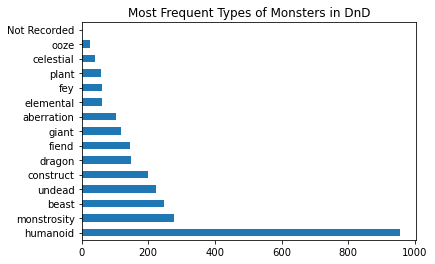

In [30]:
df_clean['type'].value_counts().plot(kind = 'barh', title = "Most Frequent Types of Monsters in DnD")

<AxesSubplot:title={'center':'Most Frequent Types of Monster Sizes in DnD'}>

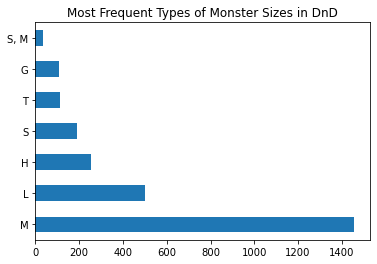

In [31]:
df_clean['size'].value_counts().plot(kind = 'barh', title = "Most Frequent Types of Monster Sizes in DnD")

<AxesSubplot:title={'center':'Most Frequent Types of Monster Alignments in DnD'}>

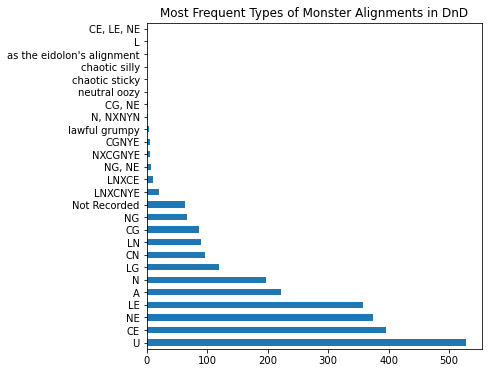

In [32]:
df_clean['alignment'].value_counts().plot(kind = 'barh', title = "Most Frequent Types of Monster Alignments in DnD", figsize = (6, 6))

There seem to be a lot of monsters whose alignments are ***Not Recorded***, fall into multiple categories (i.e. "CE, LE, NE", "LNXCNYE"), or do not follow the standard alignment categories (i.e. "lawful grumpy", "chaotic silly"). A few monsters also do not have an assigned ***type***. Let's remove any monsters with these values from our dataset.

In [33]:
# remove alignments falling into multiple categories, not
# following standard alignments, or that are not recorded
df_clean = df_clean[df_clean.alignment.isin(['NG', 'CG', 'LN', 'CN', 'LG', 'A', 'LE', 'NE', 'CE', 'U'])]
df_clean = df_clean[df_clean['type'] != "Not Recorded"]
df_clean.shape

(2331, 28)

<AxesSubplot:title={'center':'Most Frequent Types of Monster Alignments in DnD'}>

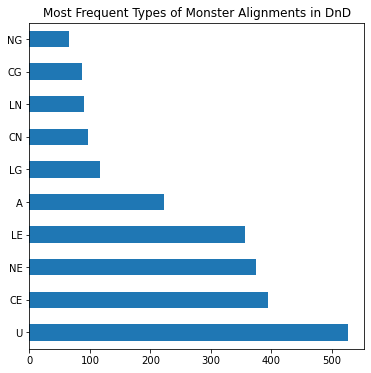

In [34]:
df_clean['alignment'].value_counts().plot(kind = 'barh', title = "Most Frequent Types of Monster Alignments in DnD", figsize = (6, 6))

Our textual data is looking great so far. Let's focus on our numerical data now. We currently have $2,331$ monsters in our dataframe.

### **3.1 Challenge Ratings**
The ***cr*** column is our data on a monster's **Challenge Rating**, or *how difficult it is for a party of four adventurers to defeat a given monster*.

Let's take a look at how ***cr*** values are distributed.

Text(0.5, 1.0, 'Monster Challenge Ratings')

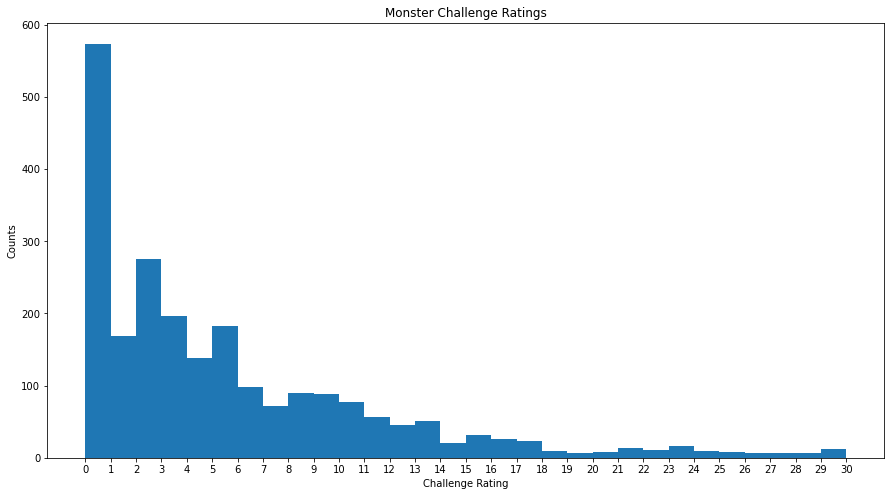

In [35]:
# plot distribution of cr values for monsters
plt.figure(figsize=(15,8)) 
plt.hist(df_clean.cr, bins = np.arange(min(df_clean.cr), max(df_clean.cr)+1, 1))
plt.xlabel("Challenge Rating")
plt.ylabel("Counts")
plt.xticks(np.arange(min(df_clean.cr), max(df_clean.cr)+1, 1))
plt.title("Monster Challenge Ratings")

***Challenge Ratings*** appear to have a **skewed distribution**, with a **long right tail** as very few monsters have ***cr*** values above $20$.

Next, let's take a look at how ***cr*** is related to other stats.

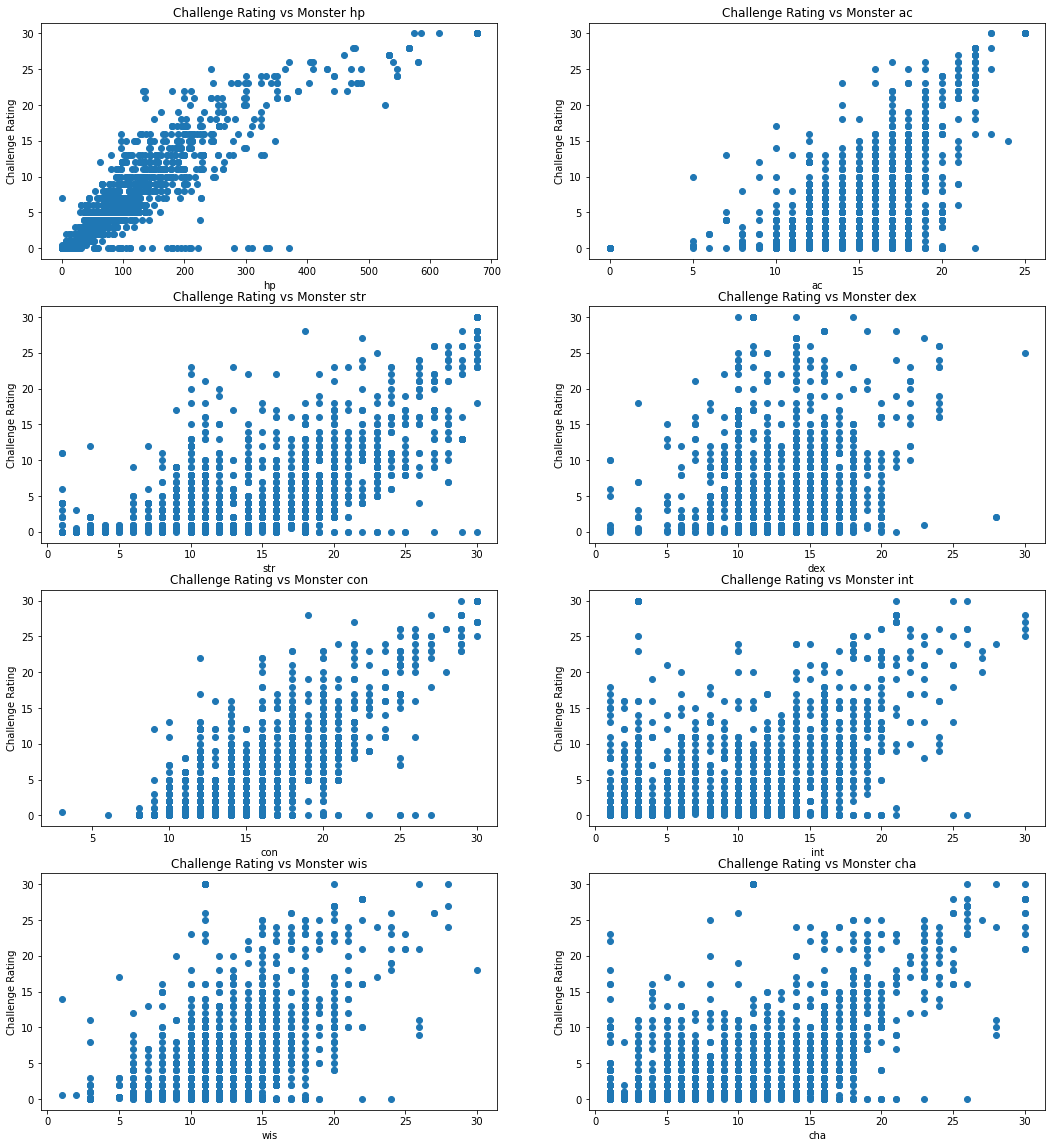

In [36]:
# plot cr values against base stats of monsters
fig, ax = plt.subplots(4, 2, figsize = (18, 20))
stats = [['hp', 'ac'], ['str', 'dex'], ['con', 'int'], ['wis', 'cha']]
for i in range(4):
    for j in range(2):
        ax[i, j].scatter(df_clean[stats[i][j]], df_clean.cr)
        ax[i, j].set_title('Challenge Rating vs Monster {stat}'.format(stat=stats[i][j]))
        ax[i, j].set_xlabel(stats[i][j])
        ax[i, j].set_ylabel('Challenge Rating')

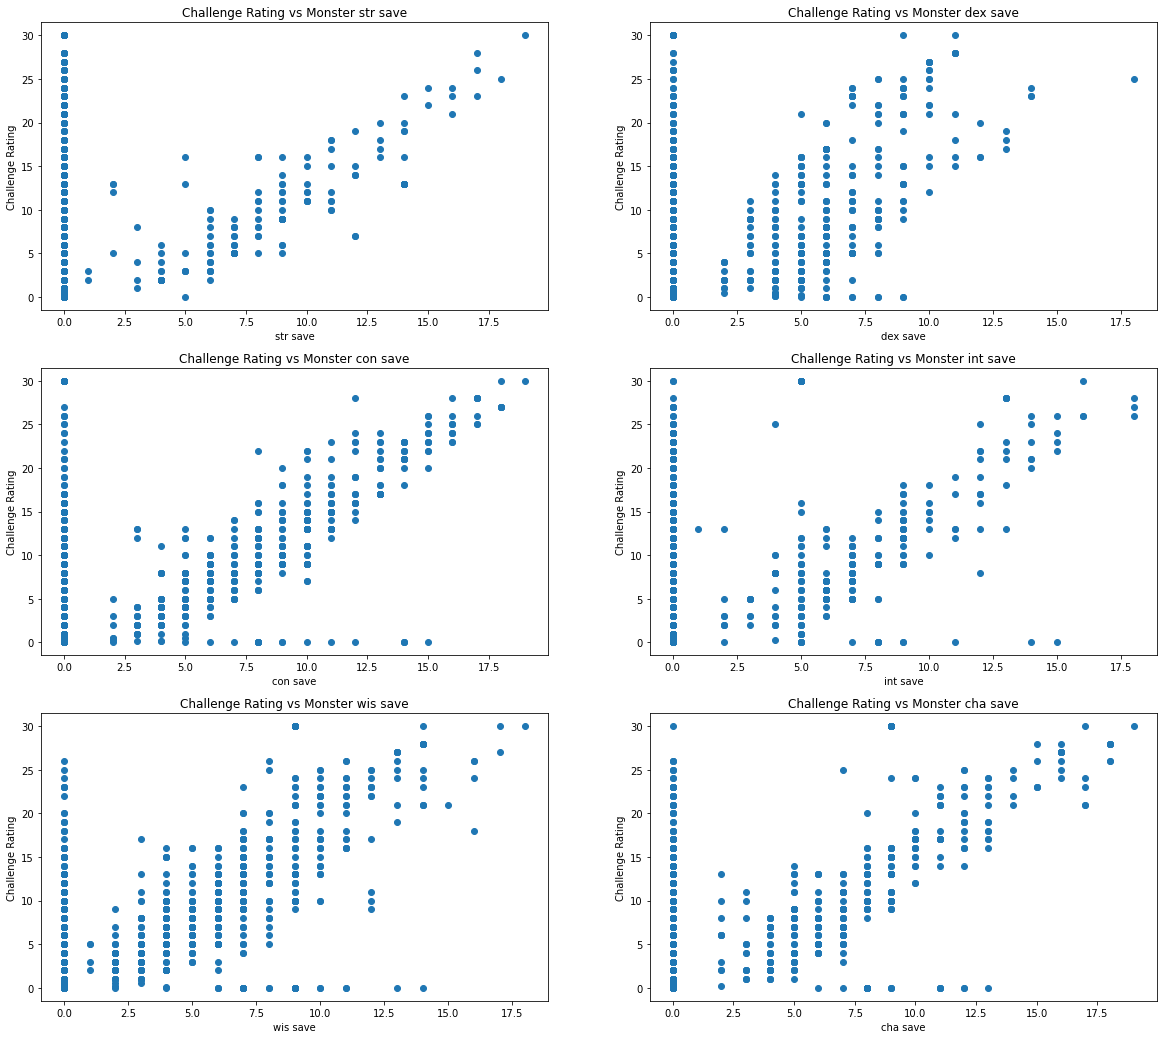

In [37]:
# plot cr values against save throw modifiers of monsters
fig, ax = plt.subplots(3, 2, figsize = (20, 18))
saves = [['str_save', 'dex_save'], ['con_save', 'int_save'], ['wis_save', 'cha_save']]
for i in range(3):
    for j in range(2):
        ax[i, j].scatter(df_clean[saves[i][j]], df_clean.cr)
        ax[i, j].set_title('Challenge Rating vs Monster {stat}'.format(stat=saves[i][j].replace("_", " ")))
        ax[i, j].set_xlabel(saves[i][j].replace("_", " "))
        ax[i, j].set_ylabel('Challenge Rating')

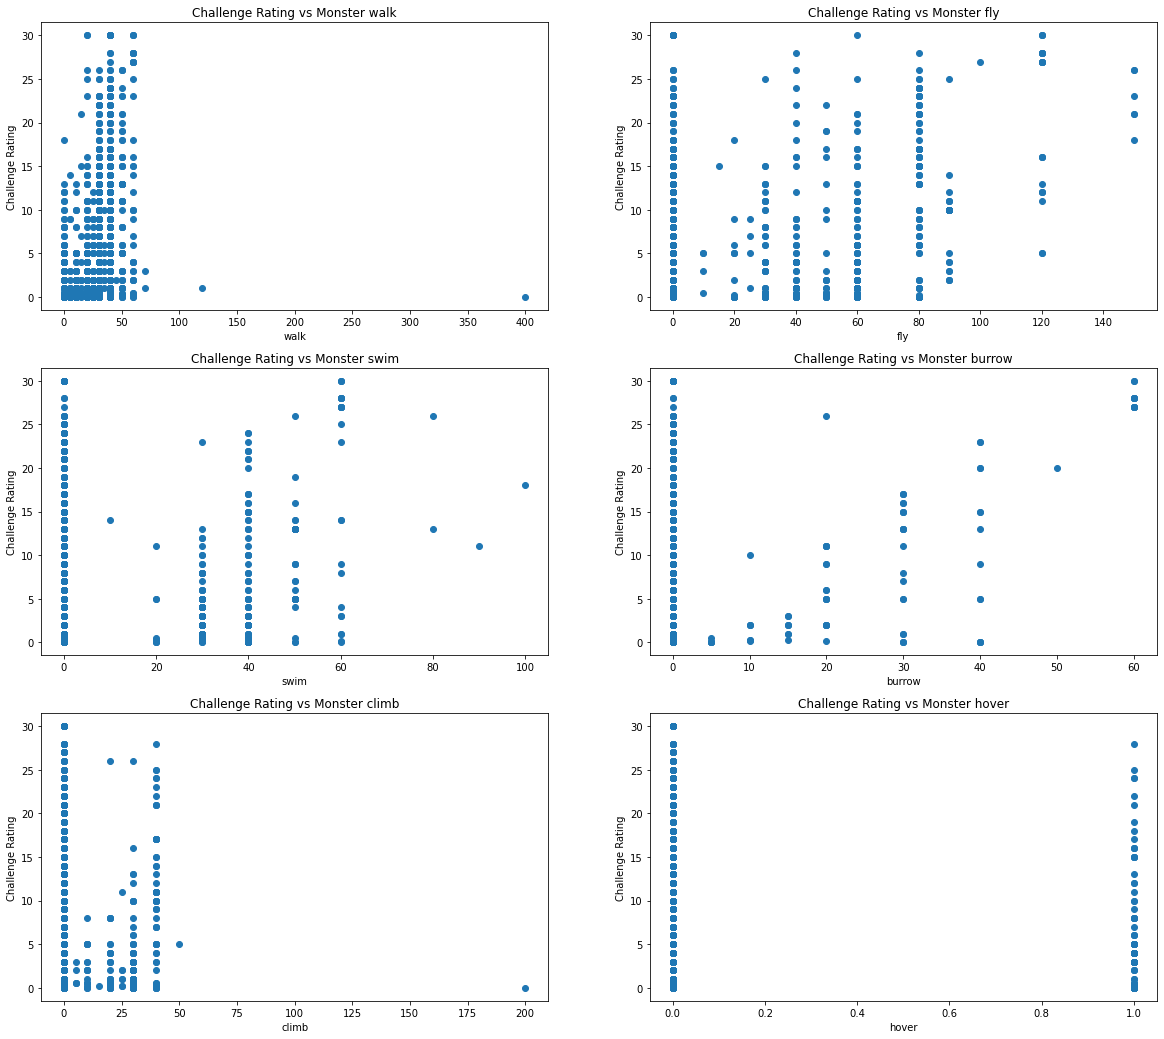

In [38]:
# plot cr values against movement stats of monsters
fig, ax = plt.subplots(3, 2, figsize = (20, 18))
move = [['walk', 'fly'], ['swim', 'burrow'], ['climb', 'hover']]
for i in range(3):
    for j in range(2):
        ax[i, j].scatter(df_clean[move[i][j]], df_clean.cr)
        ax[i, j].set_title('Challenge Rating vs Monster {stat}'.format(stat=move[i][j]))
        ax[i, j].set_xlabel(move[i][j])
        ax[i, j].set_ylabel('Challenge Rating')

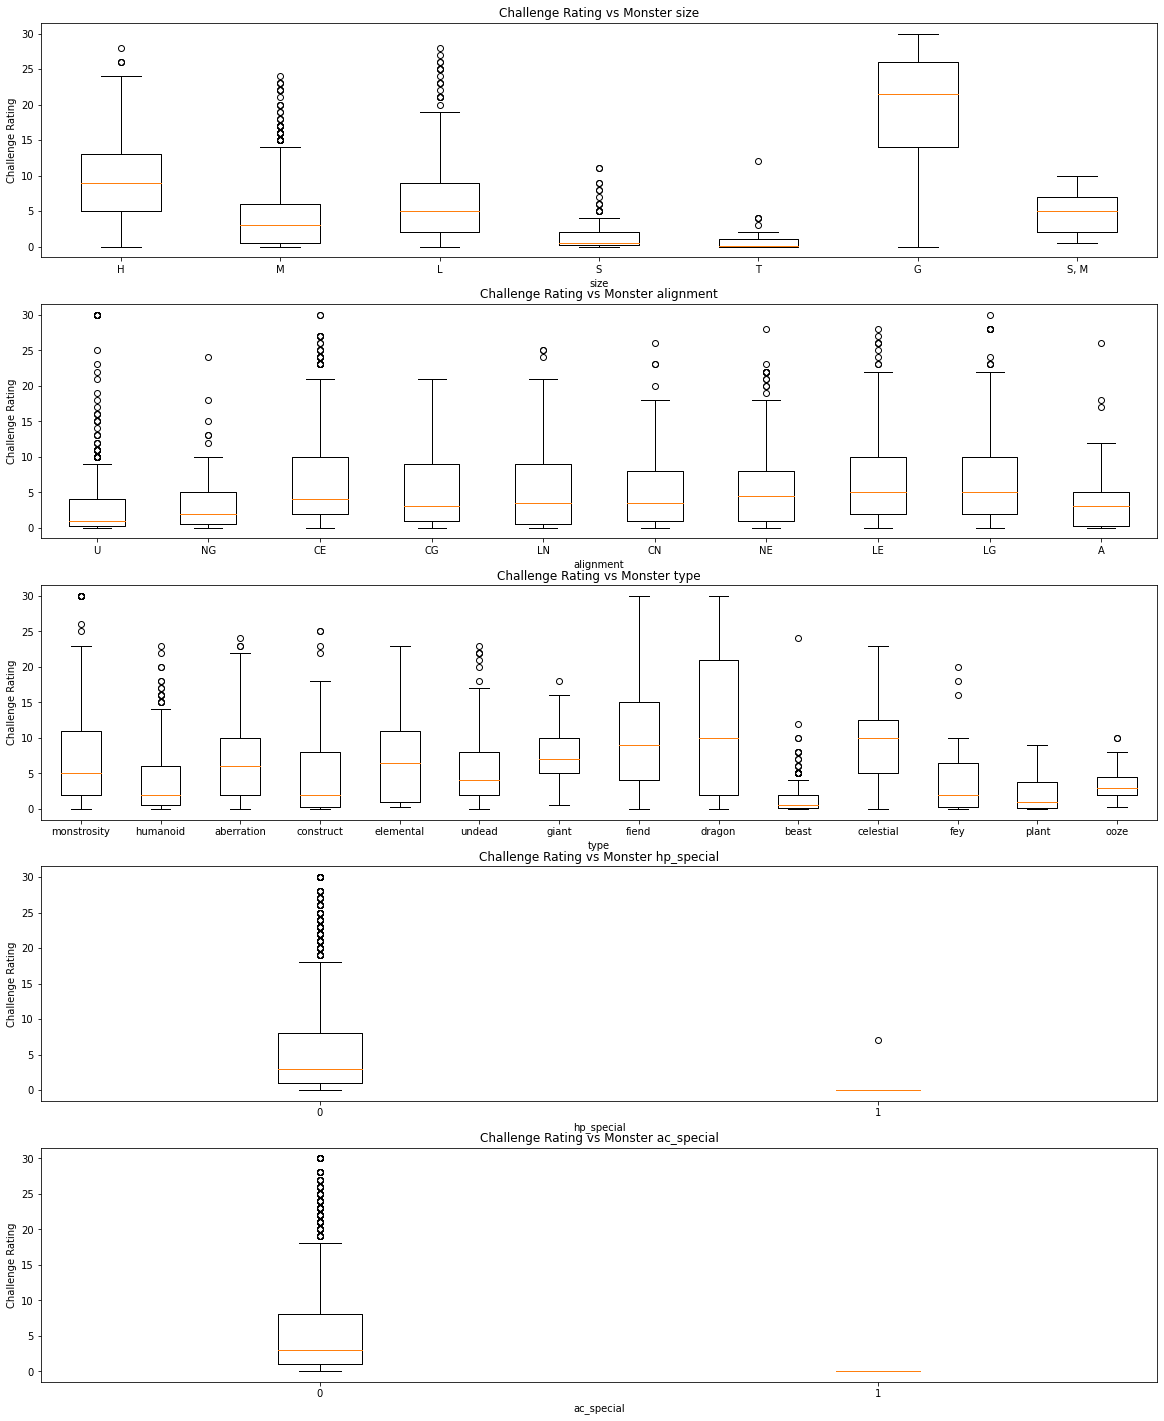

In [39]:
# plot cr values against categorical stats of monsters
fig, ax = plt.subplots(5, 1, figsize = (20, 25))
attr = ['size', 'alignment', 'type', 'hp_special', 'ac_special']
for i in range(5):
    ax[i].boxplot([df_clean[df_clean[attr[i]] == val].cr for val in df_clean[attr[i]].unique()], labels = df_clean[attr[i]].unique())
    ax[i].set_title('Challenge Rating vs Monster {stat}'.format(stat=attr[i]))
    ax[i].set_xlabel(attr[i])
    ax[i].set_ylabel('Challenge Rating')

The ***hp*** attribute seems to have a strong correlation with ***cr***, so we can expect this variable to be important in predicting a monster's ***cr***.

### **3.2 Preparing Our Data**

Notice also that there seem to be no monsters that have an ***ac_special*** attribute and only one monster with a ***hp_special*** attribute, perhaps since our data cleaning process has removed monsters with these attributes. We can ignore the ***ac_special*** and ***hp_special*** columns since they do not provide any useful information on our monsters.

We see that monsters of a certain ***type***, ***alignment***, or ***size*** can have different distrubutions of ***cr*** values. The ***type***, ***alignment***, and ***size*** attributes are categorical data. When we build a machine learning model down the line, our models will not be able to use this textual information. Let's convert these columns into **indicator variables**.

Another interesting feature of these box plots is that there seem to be monsters with a ***cr*** rating of 0 for all ***sizes*** and most ***types***. This seems counterintuitive - how is a **gargantuan** (***size*** **G**) monster at the lowest difficulty level? Let's take a look at monsters with a ***cr*** value of 0.

In [40]:
# convert categorical variables into indicator variables that can be
# used by machine learning models
df_final = pd.get_dummies(df_clean, columns = ['size', 'alignment', 'type'])
df_final.drop(columns = ['ac_special', 'hp_special'], inplace = True) # remove unnecessary columns
df_final.head()

,id,name,hp,ac,cr,str,dex,con,int,wis,...,type_dragon,type_elemental,type_fey,type_fiend,type_giant,type_humanoid,type_monstrosity,type_ooze,type_plant,type_undead
0,0,Ancient Deep Crow,187,18,15.0,23,16,23,10,15,...,0,0,0,0,0,0,1,0,0,0
1,1,Auspicia Dran,52,15,2.0,16,14,14,15,12,...,0,0,0,0,0,1,0,0,0,0
3,3,Chaos Quadrapod,52,14,4.0,18,13,15,6,10,...,0,0,0,0,0,0,0,0,0,0
5,5,Deep Crow,133,17,9.0,20,16,18,8,15,...,0,0,0,0,0,0,1,0,0,0
6,6,Donaar Blit'zen,45,18,3.0,17,8,14,10,10,...,0,0,0,0,0,1,0,0,0,0


In [41]:
df_final[df_final['cr'] == 0].head(10)

,id,name,hp,ac,cr,str,dex,con,int,wis,...,type_dragon,type_elemental,type_fey,type_fiend,type_giant,type_humanoid,type_monstrosity,type_ooze,type_plant,type_undead
54,54,Harkina Hunt,4,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0
62,62,Mad Maggie,112,17,0.0,18,15,16,16,14,...,0,0,0,1,0,0,0,0,0,0
70,70,Peacock,5,10,0.0,7,10,13,2,12,...,0,0,0,0,0,0,0,0,0,0
98,100,Hag of the Fetid Gaze,82,17,0.0,18,12,16,13,14,...,0,0,1,0,0,0,0,0,0,0
126,129,Arabelle,2,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0
132,135,Barovian Commoner,4,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0
136,139,Bluto Krogarov,4,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0
144,147,Distended Corpse,4,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0
151,154,Gadof Blinsky,4,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0
152,155,Gertruda,4,10,0.0,10,10,10,10,10,...,0,0,0,0,0,1,0,0,0,0


Aha! Most monsters with a ***cr*** value of 0 have very low ***hp*** (as expected for the weakest of monsters). However, some obviously very powerful monsters like **Mad Maggie** have been assigned a ***cr*** of 0. This might be because the ***cr*** values of some monsters were not readily available during data collection. 

Let's build a model that can predict what the actual **Challenge Ratings** of these monsters should be! First, we'll separate monsters with a ***cr*** of $0$ and more than $15$ ***hp*** into a separate dataset.

In [42]:
df_val = df_final[df_final['cr'] == 0][df_final[df_final['cr'] == 0]['hp'] > 15]
df_val

,id,name,hp,ac,cr,str,dex,con,int,wis,...,type_dragon,type_elemental,type_fey,type_fiend,type_giant,type_humanoid,type_monstrosity,type_ooze,type_plant,type_undead
62,62,Mad Maggie,112,17,0.0,18,15,16,16,14,...,0,0,0,1,0,0,0,0,0,0
98,100,Hag of the Fetid Gaze,82,17,0.0,18,12,16,13,14,...,0,0,1,0,0,0,0,0,0,0
174,177,Morgantha,112,17,0.0,18,15,16,16,14,...,0,0,0,1,0,0,0,0,0,0
292,299,Giant Fly,19,11,0.0,14,13,13,2,10,...,0,0,0,0,0,0,0,0,0,0
332,339,Sea Fury,105,14,0.0,19,15,16,12,12,...,0,0,1,0,0,0,0,0,0,0
343,350,Belashyrra,304,19,0.0,24,21,20,25,22,...,0,0,0,0,0,0,0,0,0,0
384,395,Adult Crystal Dragon,172,16,0.0,21,12,21,18,15,...,1,0,0,0,0,0,0,0,0,0
385,396,Adult Deep Dragon,147,17,0.0,20,14,18,16,16,...,1,0,0,0,0,0,0,0,0,0
386,397,Adult Emerald Dragon,207,18,0.0,23,12,21,18,16,...,1,0,0,0,0,0,0,0,0,0
388,400,Adult Topaz Dragon,210,18,0.0,19,12,19,18,17,...,1,0,0,0,0,0,0,0,0,0


In [43]:
df_final.drop(index = df_val.index, inplace = True)
df_final.shape

(2279, 54)

Removing these uncertain rows, we now have $2,279$ monsters in our dataset.

Finally, let's take a quick look at the **correlation heatmaps** for our variables.

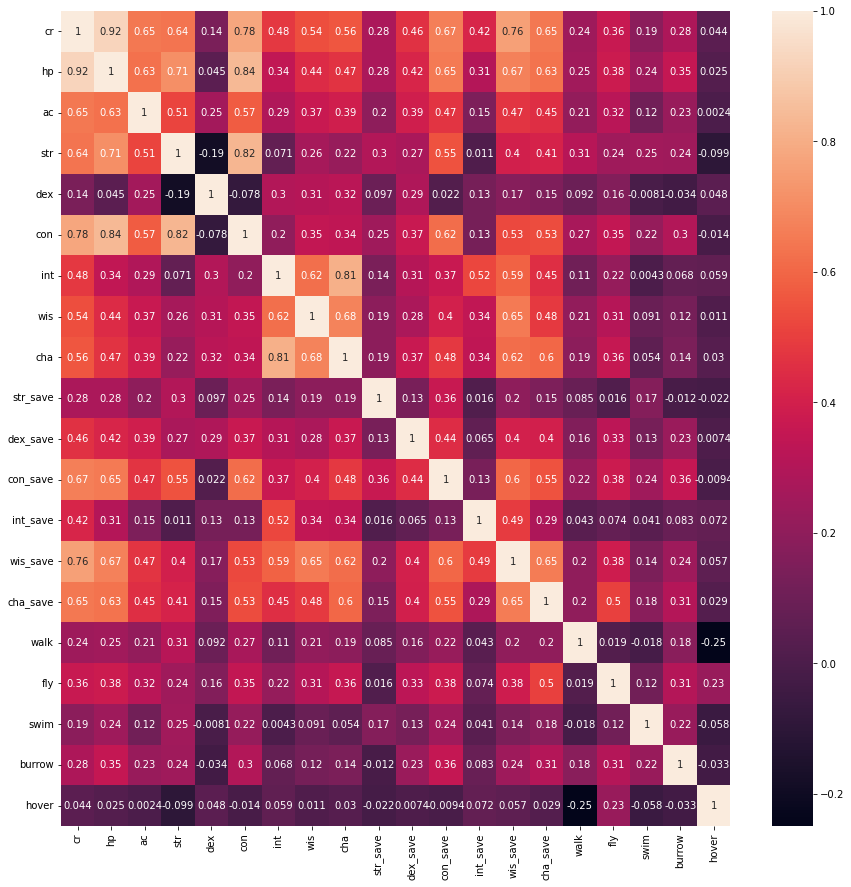

In [44]:
# plot correlation matrix of numerical values in our dataset
corr_matrix = df_final[['cr', 'hp', 'ac', 'str', 'dex', 'con', 'int', 'wis', 'cha',
                           'str_save', 'dex_save', 'con_save', 'int_save', 'wis_save',
                           'cha_save', 'walk', 'fly', 'swim', 'burrow', 'hover']].corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

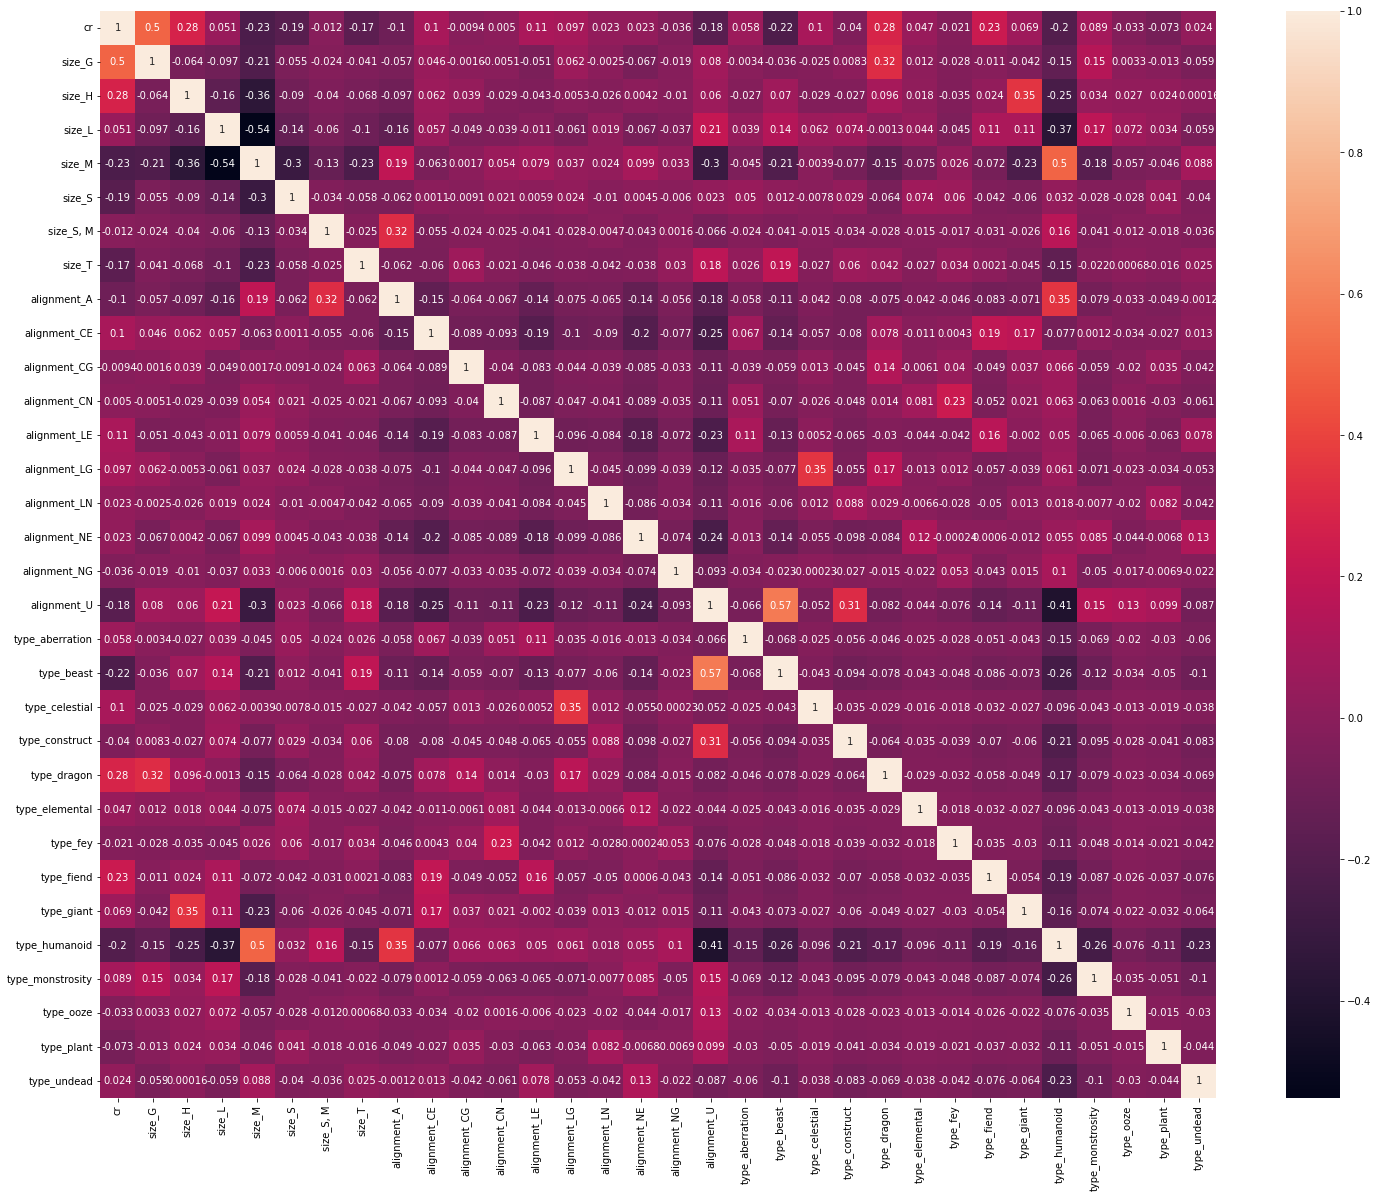

In [45]:
# plot correlation matrix for cr with categorical values in our dataset
corr_matrix = df_final[['cr'] + [col for col in df_final.columns if any(category for category in ['type', 'alignment', 'size'] if category in col)]].corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

As expected, the hp variable has the highest correlation with ***cr***. In addition, ***ac***, ***con***, ***str***, ***con_save***, ***wis_save*** and ***cha_save*** have high correlations with ***cr***. For categorical variables, having the ***type*** **Dragon** or ***size*** **Gargantuan** or **Huge** (**G** or **H**) have relatively high correlations with ***cr***.

## **4. Models for Predicting CR values using Monster Stats**

First, let's split our datasets into **training** and **testing** sets. We'll use $1500$ monsters to train our models and the remaining $779$ to test our model on **unseen data**.

In [46]:
# import useful libraries for machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# select columns to use as features
num_cols = ['hp', 'ac', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'str_save', 'dex_save', 'con_save', 'int_save', 'wis_save', 'cha_save', 'walk', 'fly', 'swim', 'burrow', 'hover']
cat_cols = [col for col in df_final.columns if any(category for category in ['type', 'alignment', 'size'] if category in col)]
cols = [col for col in df_final.columns if col not in ['id', 'cr', 'name']] # numerical and categorical

# spilt dataset into training and testing sets
# use 1500 monsters as training data
df_train = df_final.iloc[:1500, :]
df_test = df_final.iloc[1500:, :]

# get dependent variables
y_train = df_train.loc[:, 'cr']
y_test = df_test.loc[:, 'cr']

# get independent variables, using numerical features
# for linear regression models
X_train = df_train.loc[:, num_cols]
X_test = df_test.loc[:, num_cols]

# scale features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### **4.1 Linear Regression**

The vanilla of machine learning models - **linear regression**! Besides providing a good baseline to begin with, it makes sense that a monster's ***cr*** increases as its stats improve so modeling these relationships as **linear** relationships might be a reasonable assumption.

In [47]:
from sklearn.linear_model import LinearRegression

# define linear regression model
lr = LinearRegression()

# fit model on training data
lr.fit(X_train, y_train)

# make predictions on testing data
y_pred = lr.predict(X_test)

# compute R squared values for model
print('Linear Regression R-Score: ' + str(r2_score(y_pred, y_test)))

Linear Regression R-Score: 0.8761043839153726


We get an $R^{2}$ score of $0.876$, which means that about $87.6\%$ of the **variance** observed in ***cr*** values is explained by our linear regression model! That's pretty amazing for our simple model.

Let's take a look at what our **coefficients** are for each variable, to get a sense of how important each variable was in making predictions.

**Note:**

We've already **scaled** our independent variables so their coefficients are not impacted by different magnitudes that these features may have had.

     feature  feature_importance
0         hp            3.975917
12  wis_save            0.686108
11  int_save            0.564571
10  con_save            0.534563
4        con            0.519475
1         ac            0.439451
15       fly            0.330625
17    burrow            0.324091
9   dex_save            0.279628
6        wis            0.262927
3        dex            0.219820
16      swim            0.193408
7        cha            0.193271
2        str            0.136823
18     hover            0.130340
5        int            0.128340
14      walk            0.120449
8   str_save            0.052002
13  cha_save            0.029396


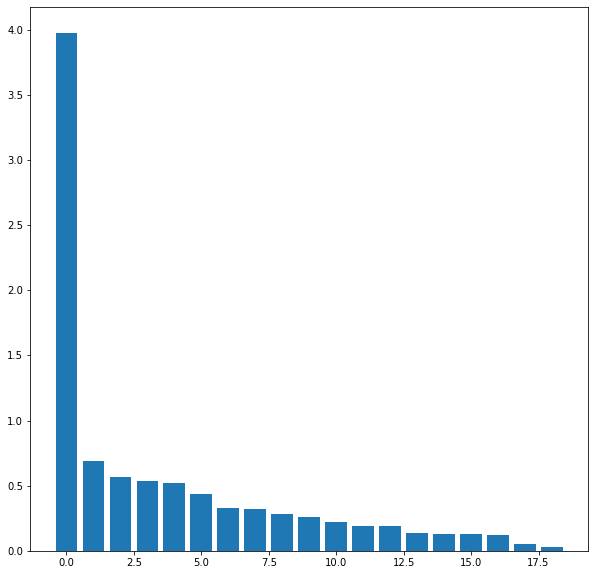

In [48]:
# get importance
importance = lr.coef_

# get feature importances and order them
feature_importance = pd.DataFrame({'feature':num_cols, 'feature_importance':[abs(i) for i in importance]})
print(feature_importance.sort_values('feature_importance',ascending=False))

# plot feature importance
plt.figure(figsize = (10, 10))
plt.bar([x for x in range(len(importance))], sorted([abs(i) for i in importance], reverse = True))
plt.show()

As expected, ***hp*** was by far the most important variable in predicting a monster's **challenge rating**. Other important variables included ***wis_save***, ***int_save***, ***con_save*** and ***con***.

### **4.2 Huber Regression**

It's possible that we may have **outliers** in our data. Let's test out a **Huber regression** model, since it's more resistant to outliers.

In [49]:
from sklearn.linear_model import HuberRegressor

# define Huber regression model
hr = HuberRegressor()

# fit model on training data
hr.fit(X_train, y_train)

# make predictions on testing data
y_pred = hr.predict(X_test)

# compute R squared values for model
print('Huber Regression R-Score: ' + str(r2_score(y_pred, y_test)))

Huber Regression R-Score: 0.8891486631140154


     feature  feature_importance
0         hp            4.709450
12  wis_save            0.792079
11  int_save            0.599169
4        con            0.408521
17    burrow            0.369251
10  con_save            0.339574
1         ac            0.297202
7        cha            0.239675
15       fly            0.196052
16      swim            0.195525
6        wis            0.193683
9   dex_save            0.193616
3        dex            0.160325
8   str_save            0.121798
14      walk            0.115888
18     hover            0.077316
5        int            0.052739
2        str            0.026165
13  cha_save            0.008637


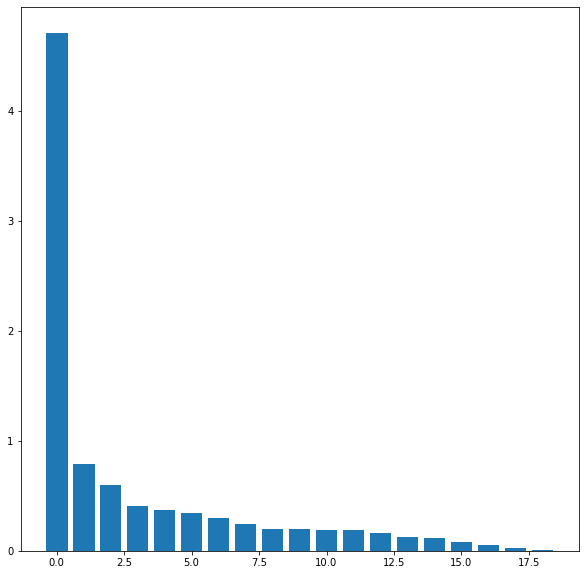

In [50]:
# get importance
importance = hr.coef_

# get feature importances and order them
feature_importance = pd.DataFrame({'feature':num_cols, 'feature_importance':[abs(i) for i in importance]})
print(feature_importance.sort_values('feature_importance',ascending=False))

# plot feature importance
plt.figure(figsize = (10, 10))
plt.bar([x for x in range(len(importance))], sorted([abs(i) for i in importance], reverse = True))
plt.show()

We have a slight improvement with our $R^{2}$ score of $0.889$. As with our linear regression model, ***hp***, ***wis_save***, and ***con_save*** remain the most important variables in our model.

### **4.3 XGBoost Regression**

Finally, let's test out a fancier model - **XGBoost regression**! This time, we can plug in all our numerical and categorical variables. 

In [51]:
from xgboost import XGBRegressor

# define XGBoost model
xgb = XGBRegressor(seed = 2022)

# get independent variables, using all available features (numerical and 
# categorical)
X_train = df_train.loc[:, cols]
X_test = df_test.loc[:, cols]

# fit the model on training data
xgb.fit(X_train, y_train)

# make predictions on testing data
y_pred = xgb.predict(X_test)

# compute R squared values for model
print('XGBoost Regression R-Score: ' + str(r2_score(y_pred, y_test)))

XGBoost Regression R-Score: 0.937073680628155


             feature  feature_importance
0                 hp            0.482768
18          wis_save            0.081817
17          int_save            0.055526
16          con_save            0.037588
1                 ac            0.033141
19          cha_save            0.023230
43          type_fey            0.017491
15          dex_save            0.014953
5                int            0.014594
32      alignment_LG            0.014475
7                cha            0.013224
4                con            0.010890
39    type_celestial            0.009892
25         size_S, M            0.009613
14          str_save            0.009231
42    type_elemental            0.009167
50       type_undead            0.008623
8               walk            0.008415
37   type_aberration            0.008146
38        type_beast            0.007854
36       alignment_U            0.007687
44        type_fiend            0.007565
3                dex            0.007379
33      alignmen

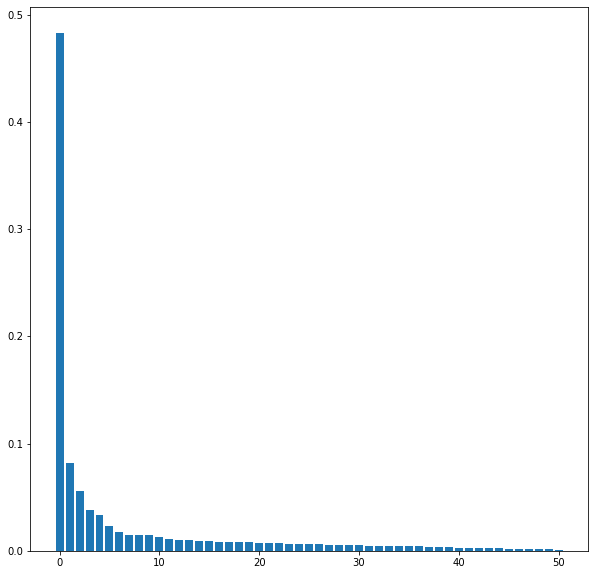

In [52]:
# get importance
importance = xgb.feature_importances_

# get feature importances and order them
feature_importance = pd.DataFrame({'feature':X_train.columns, 'feature_importance':[i for i in importance]})
print(feature_importance.sort_values('feature_importance',ascending=False))

# plot feature importance
plt.figure(figsize = (10, 10))
plt.bar([x for x in range(len(importance))], sorted(importance, reverse = True))
plt.show()

As with previous models, ***hp*** and ***wis_save*** remain the most important variables in predicting ***cr***. Our **XGBoost** model also boasts the best performance with an $R^{2}$ score of $0.937$. Also note that 12 of our variables have an importance score of $0$, meaning they were not used by our model at all in making predictions. We can remove these variables from our model without much compromise on performance.

## **5. Using Our Models to predict Missing Challenge Ratings**

Let's use our **XGBoost Regression** model to predict the ***cr*** of monsters we had set aside due to unreasonable ***cr*** assignments.

In [53]:
# get dependent variables
y_val = df_val.loc[:, 'cr']

# get independent variables, using numerical and categorical variables
X_val = df_val.loc[:, cols]
# X_val = ss.fit_transform(X_val)

# make predictions on testing data
y_pred_val = xgb.predict(X_val)

# add predicted cr values to our dataframe, rounded down to nearest int
df_val['pred_cr'] = y_pred_val.astype(int)

# output monsters with their predicted cr values and the 7 most
# important variables for the model
df_val[['name', 'cr', 'hp', 'wis_save', 'ac', 'cha_save', 'int_save', 'con_save', 'int', 'pred_cr']]

,name,cr,hp,wis_save,ac,cha_save,int_save,con_save,int,pred_cr
62,Mad Maggie,0.0,112,0,17,0,0,0,16,7
98,Hag of the Fetid Gaze,0.0,82,0,17,0,0,0,13,5
174,Morgantha,0.0,112,0,17,0,0,0,16,7
292,Giant Fly,0.0,19,0,11,0,0,0,2,0
332,Sea Fury,0.0,105,0,14,0,0,0,12,8
343,Belashyrra,0.0,304,13,19,13,14,0,25,22
384,Adult Crystal Dragon,0.0,172,6,16,8,0,9,18,12
385,Adult Deep Dragon,0.0,147,7,17,8,0,8,16,9
386,Adult Emerald Dragon,0.0,207,8,18,9,0,10,18,15
388,Adult Topaz Dragon,0.0,210,8,18,9,0,9,18,15


### **5.1 Visualing Our Predictions using PCA**

To get a sense of whether our model is making reasonable predictions for our **validation data**, let's use ***Principal Component Analysis (PCA)*** to reduce the **dimensionality** of our features to just $2$ variables. Then, we can plot our data to **visualize** the pattern of our predictions versus our actual data.

In [54]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2) # reduce to just 2 variables

# use PCA to transform our features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)
  
# check the percentage of variance explained by our PCA
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.89076689, 0.0554177 ])

Our **explained variance ratios** for the first two **PCA components** are $0.891$ and $0.055$, meaning the first and second components explain $89.1\%$ and $5.5\%$ of the variance we see in our features. Most of our **observed variance** can be explained by just the first **PCA component**!

Now let's **visualize** the distribution of ***cr*** values for our actual data and predictions.

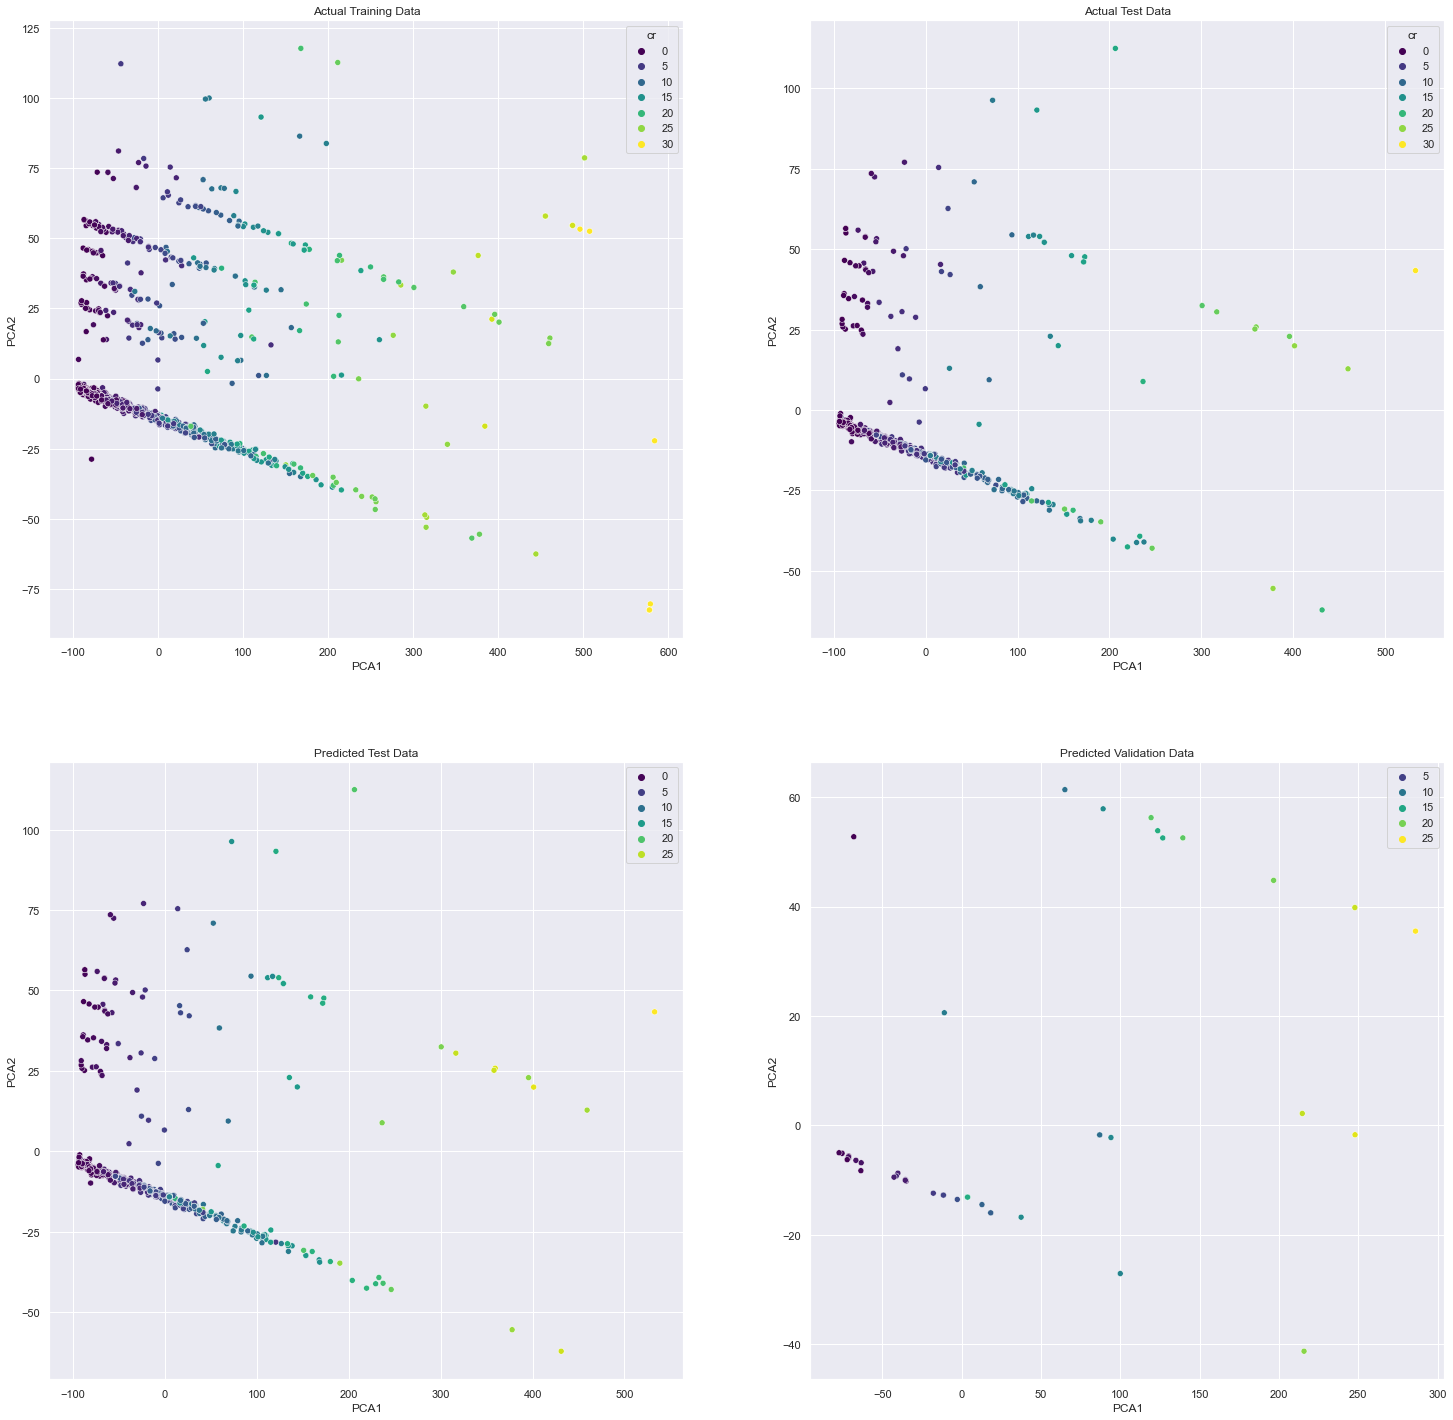

In [55]:
sns.set_theme() # set background of seaborn plot

# plot cr values for different sets of data, using the
# pca components as our two axes
fig, ax = plt.subplots(2, 2, figsize = (25, 25))
hues = [[y_train, y_test], [y_pred, y_pred_val]]
data = [[X_train_pca, X_test_pca], [X_test_pca, X_val_pca]]
title = [['Actual Training', 'Actual Test'], ['Predicted Test', 'Predicted Validation']]

for i in range(0, 2, 1):
    for j in range(0, 2, 1):
        sns.scatterplot(x = data[i][j][:, 0],
                       y = data[i][j][:, 1],
                       hue = hues[i][j], ax = ax[i, j],
                       palette = sns.color_palette("viridis", as_cmap=True))
        ax[i, j].set_xlabel('PCA1')
        ax[i, j].set_ylabel('PCA2')
        ax[i, j].set_title("{data} Data".format(data = title[i][j]))

These predicted **challenge ratings** in our second row follow a similar distribution pattern to our actual data in the first row. This looks reasonable for most of our monsters!

Over the course of this notebook we've extensively **cleaned** our dataset of monsters, **visualized** the distribution of different stats, **trained models** to **predict** a monster's challenge ratings and seen the most important stats for determining challenge ratings. **Further improvements** in this process could involve finding more datasets on DnD monsters to aggregate, adding other relevant features about monsters (such as whether a monster is legendary, which provides monsters additional powers), or using more sophisticated machine learning models to make better predictions.